In [1]:
import numpy as np
import nibabel as nib
from nilearn.plotting import plot_surf_stat_map
from matplotlib import pyplot as plt
import pandas as pd

/home/fralberti/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


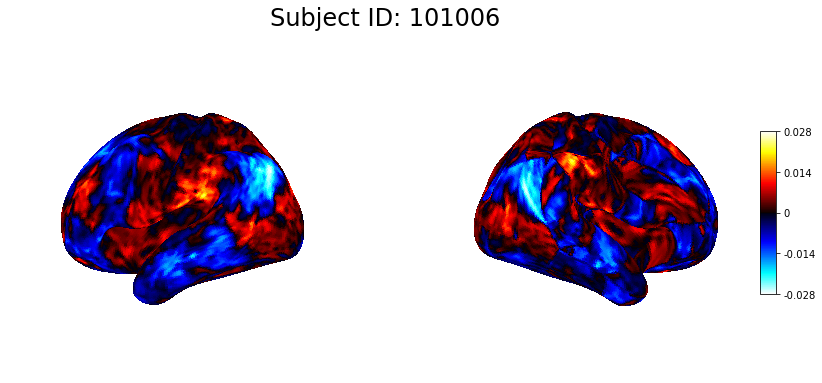

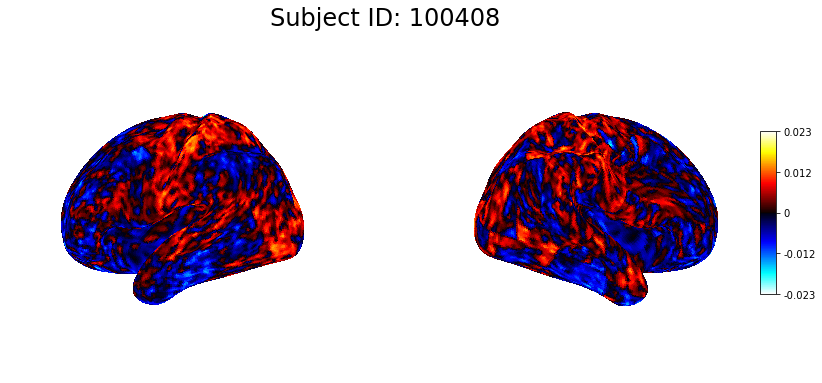

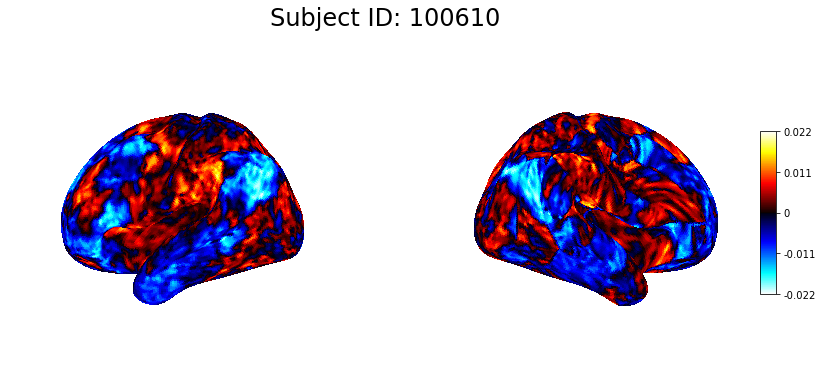

In [4]:
for sub in np.load('/home/fralberti/Data/Concatenated_dtseries/subject_IDs.npy'):
    grad1 = nib.load('/home/fralberti/Data/Gradient_1/%s_grad1.dscalar.nii' % sub)
    fig, axs = plt.subplots(1, 2, figsize=(15,6), subplot_kw={'projection':'3d'}, sharey=True)
    
    for i, hemi in enumerate(['L','R']):
        hemisphere = ['left','right']
        surf = nib.load('/home/fralberti/Data/HCP_zone_prim/%s/%s.%s.midthickness_MSMAll.32k_fs_LR.surf.gii' % (sub,sub,hemi))
        
        idx_count = grad1.header.get_index_map(1)[i].index_count
        vtx_indices = grad1.header.get_index_map(1)[i].vertex_indices[0:]
        stat_map = np.zeros(surf.agg_data()[0].shape[0])
        stat_map[vtx_indices] = np.asanyarray(grad1.get_fdata().squeeze()[0:idx_count])

        
        plot_surf_stat_map('/home/fralberti/Data/HCP_S1200_Group_Avg_v1/HCP_S1200_GroupAvg_v1/S1200.%s.inflated_MSMAll.32k_fs_LR.surf.gii' % hemi,
                           stat_map, hemi=hemisphere[i], axes=axs[i],colorbar=i)
        fig.suptitle('Subject ID: %s' % sub, fontsize=24)
        del surf
    del grad1
